# **Face Emotion Recognition Using Machine Learning | Python |CNN**

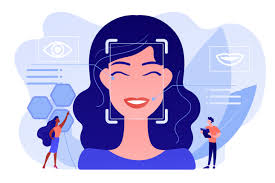

**What is the meaning of emotion detection?**
Emotion detection is the task of recognizing a person's emotional state — for example, anger, sad ,happy, fear

dataset link [dataset](https://https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset)

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle

Saving kaggle.json to kaggle.json
usage: kaggle [-h] [-v] [-W] {competitions,c,datasets,d,kernels,k,models,m,files,f,config} ...
kaggle: error: the following arguments are required: command


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jonathanoheix/face-expression-recognition-dataset")

print("Path to dataset files:", path)

100%|██████████| 121M/121M [00:01<00:00, 89.8MB/s]

Extracting model files...


Path to dataset files: /root/.cache/kagglehub/datasets/jonathanoheix/face-expression-recognition-dataset/versions/1


In [3]:
import kagglehub
import os
import pandas as pd

In [4]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

Dataset URL: https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset
License(s): unknown
 95% 114M/121M [00:00<00:00, 181MB/s] 
100% 121M/121M [00:00<00:00, 187MB/s]


In [5]:
!unzip face-expression-recognition-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!pip install keras
!pip install tensorflow
!pip install keras_preprocessing
!pip install tqdm
! pip indstall opencv-contrib-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.2 MB/s eta 0:00:00
ERROR: unknown command "indstall" - maybe you meant "install"


In [8]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [9]:
Train_dir='/content/images/train'
Test_dir='/content/images/test'

In [10]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [11]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(Train_dir)

sad completed
surprise completed
disgust completed
happy completed
fear completed
neutral completed
angry completed


In [12]:
print(train)

                                       image  label
0        /content/images/train/sad/33053.jpg    sad
1         /content/images/train/sad/8744.jpg    sad
2        /content/images/train/sad/31537.jpg    sad
3        /content/images/train/sad/30411.jpg    sad
4        /content/images/train/sad/25004.jpg    sad
...                                      ...    ...
28816   /content/images/train/angry/9707.jpg  angry
28817  /content/images/train/angry/27151.jpg  angry
28818   /content/images/train/angry/5848.jpg  angry
28819  /content/images/train/angry/27930.jpg  angry
28820    /content/images/train/angry/433.jpg  angry

[28821 rows x 2 columns]


In [14]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(Test_dir)

sad completed
surprise completed
disgust completed
happy completed
fear completed
neutral completed
angry completed


In [15]:
print(test)

                                     image  label
0       /content/images/test/sad/16304.jpg    sad
1       /content/images/test/sad/32932.jpg    sad
2       /content/images/test/sad/28296.jpg    sad
3       /content/images/test/sad/15167.jpg    sad
4       /content/images/test/sad/10620.jpg    sad
...                                    ...    ...
7061  /content/images/test/angry/10554.jpg  angry
7062  /content/images/test/angry/30619.jpg  angry
7063  /content/images/test/angry/21836.jpg  angry
7064  /content/images/test/angry/35447.jpg  angry
7065  /content/images/test/angry/31042.jpg  angry

[7066 rows x 2 columns]


In [16]:
print(test['image'])

0         /content/images/test/sad/16304.jpg
1         /content/images/test/sad/32932.jpg
2         /content/images/test/sad/28296.jpg
3         /content/images/test/sad/15167.jpg
4         /content/images/test/sad/10620.jpg
                        ...                 
7061    /content/images/test/angry/10554.jpg
7062    /content/images/test/angry/30619.jpg
7063    /content/images/test/angry/21836.jpg
7064    /content/images/test/angry/35447.jpg
7065    /content/images/test/angry/31042.jpg
Name: image, Length: 7066, dtype: object


In [17]:
from tqdm.notebook import tqdm
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [18]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [19]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [20]:
x_train = train_features/255.0
x_test = test_features/255.0

In [21]:
!pip install scikit-learn

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train['label'])


LabelEncoder()

In [23]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [24]:
y_train = to_categorical(y_train,num_classes = 7)#angry,sad,...
y_test = to_categorical(y_test,num_classes = 7)

In [25]:

model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [27]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 38s 91ms/step - accuracy: 0.2352 - loss: 1.8377 - val_accuracy: 0.2583 - val_loss: 1.8109
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.2464 - loss: 1.8109 - val_accuracy: 0.2535 - val_loss: 1.7785
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.2647 - loss: 1.7558 - val_accuracy: 0.3261 - val_loss: 1.6299
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.3553 - loss: 1.6199 - val_accuracy: 0.4336 - val_loss: 1.4795
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.4023 - loss: 1.5322 - val_accuracy: 0.4800 - val_loss: 1.3661
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.4413 - loss: 1.4441 - val_accuracy: 0.4987 - val_loss: 1.3214
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.4639 - loss: 1.3954 - val_accuracy: 0.5103 - val_loss: 1.2834
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.4783 - loss: 1

In [28]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [29]:
from keras.models import model_from_json

In [30]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [31]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [32]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0


In [33]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad


/usr/local/lib/python3.10/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
model prediction is  sad


In [36]:
image = 'images/test/angry/10079.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
model prediction is  angry


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
model prediction is  angry


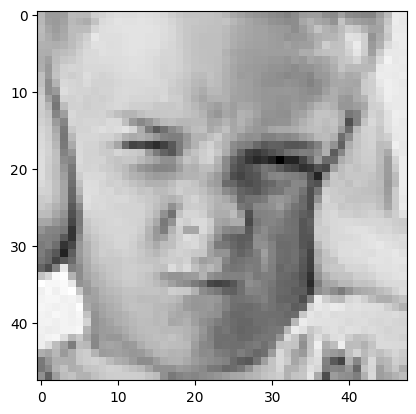

In [39]:
image = 'images/test/angry/10079.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
model prediction is  sad


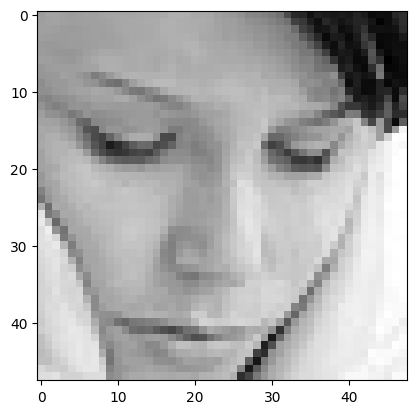

In [40]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
model prediction is  surprise


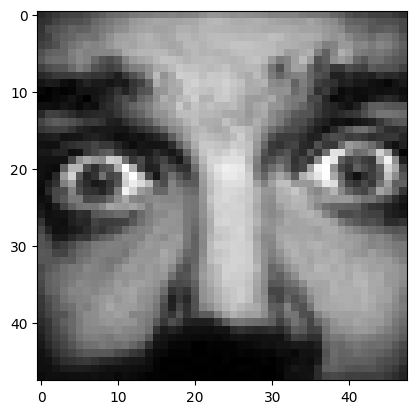

In [41]:
image = 'images/test/fear/10029.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
model prediction is  fear


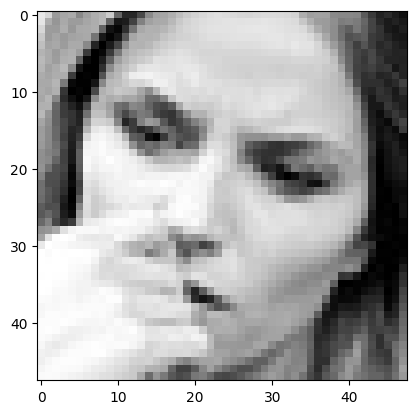

In [43]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of nutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
model prediction is  happy


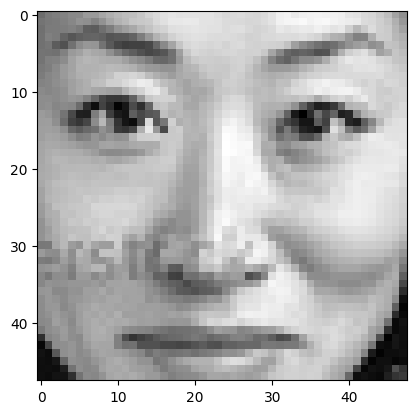

In [45]:
image = 'images/test/neutral/1045.jpg'
print("original image is of nutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
model prediction is  disgust


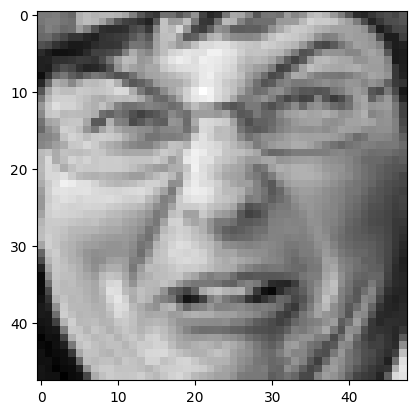

In [46]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
model prediction is  happy


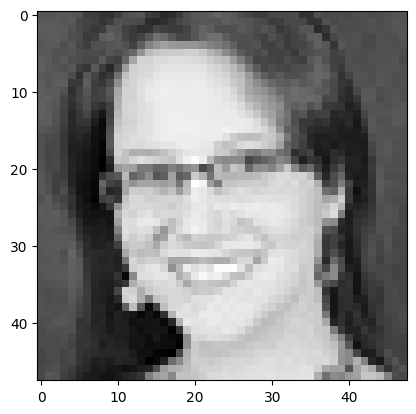

In [47]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
model prediction is  fear


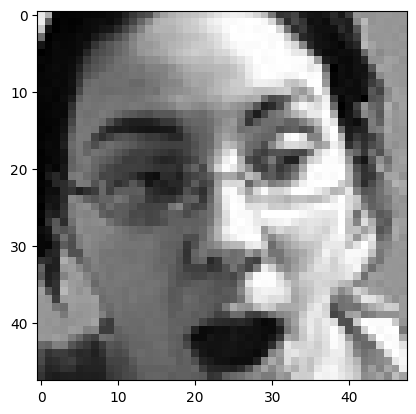

In [48]:
image = 'images/test/surprise/10800.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 23s 72ms/step - accuracy: 0.7286 - loss: 0.7486 - val_accuracy: 0.6312 - val_loss: 1.0358
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.7296 - loss: 0.7491 - val_accuracy: 0.6284 - val_loss: 1.0410
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.7332 - loss: 0.7327 - val_accuracy: 0.6311 - val_loss: 1.0421
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.7369 - loss: 0.7209 - val_accuracy: 0.6350 - val_loss: 1.0387
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.7328 - loss: 0.7365 - val_accuracy: 0.6279 - val_loss: 1.0330
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.7376 - loss: 0.7290 - val_accuracy: 0.6275 - val_loss: 1.0440
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.7383 - loss: 0.7115 - val_accuracy: 0.6305 - val_loss: 1.0385
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.7404 - loss: 0

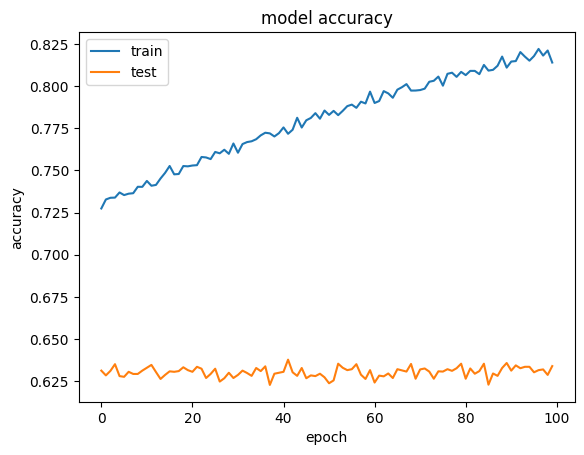

In [52]:
# graph of validation of training testing
import matplotlib.pyplot as plt

# Assuming 'model' is your Keras model and you have training data 'X_train', 'y_train'
# and validation data 'X_val', 'y_val'
history = model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) #This line was missing and is the source of the error

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

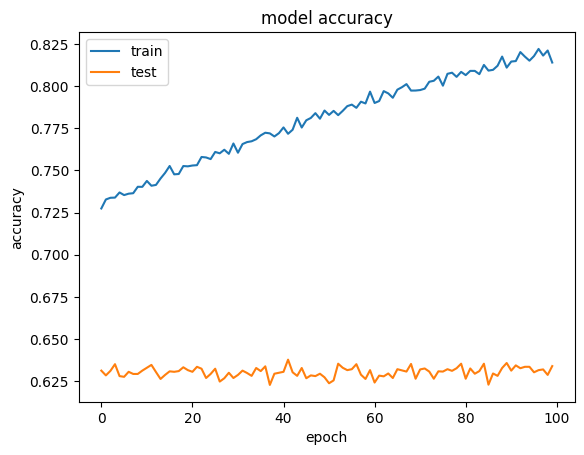

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')